<a href="https://colab.research.google.com/github/shivadb/Kaggle/blob/dev/ECE225A_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Import
Public datasets on kaggle are publically accessible through google cloud. We will utilize the gcsfs library to directly access the data from GCS.

In [260]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"]=15,15

In [261]:
# gcsfs required to read files from google cloud storage
! pip install gcsfs

[GCS Link](https://console.cloud.google.com/storage/browser/kds-51b0522af087dbaafe40bba4aea1224f3edc633feb27a46bd5bfdf52)

In [4]:
GCS_PATH = 'gs://kds-51b0522af087dbaafe40bba4aea1224f3edc633feb27a46bd5bfdf52'
LISTINGS_PATH = GCS_PATH + '/listings.csv'

listings_df = pd.read_csv(LISTINGS_PATH)
listings_df

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,

#Data Cleanup
Any cleanup required to perform EDA and build predictive models will be outlined in this section

In [164]:
# Add a cleaned price column that is numeric
listings_df['price_clean'] = listings_df['price'].str.replace(',', '').str.replace('$', '').astype(float)

In [266]:
# Add a column with with clean numeric ratings (replace NaN with 0)
listings_df['rating_clean'] = listings_df['review_scores_rating'].fillna(0)

94.53926206244087

In [247]:
mapping = {'f':0, 't':1, np.nan:0}
listings_df['host_is_superhost'].unique()
listings_df['is_superhost_clean'] = listings_df['host_is_superhost'].replace(mapping).astype(int)
listings_df['is_superhost_clean']

0       0
1       1
2       0
3       0
4       0
       ..
3813    0
3814    0
3815    0
3816    0
3817    0
Name: is_superhost_clean, Length: 3818, dtype: int64

In [262]:
listings_df['neighbourhood_cleansed']

0       West Queen Anne
1       West Queen Anne
2       West Queen Anne
3       West Queen Anne
4       West Queen Anne
             ...       
3813            Fremont
3814        Portage Bay
3815      Rainier Beach
3816       Madison Park
3817    East Queen Anne
Name: neighbourhood_cleansed, Length: 3818, dtype: object

#EDA

##Location


###Visualization
[Stock Image of Seattle](https://cdn4.vectorstock.com/i/1000x1000/54/63/city-map-seattle-color-detailed-plan-vector-22495463.jpg)

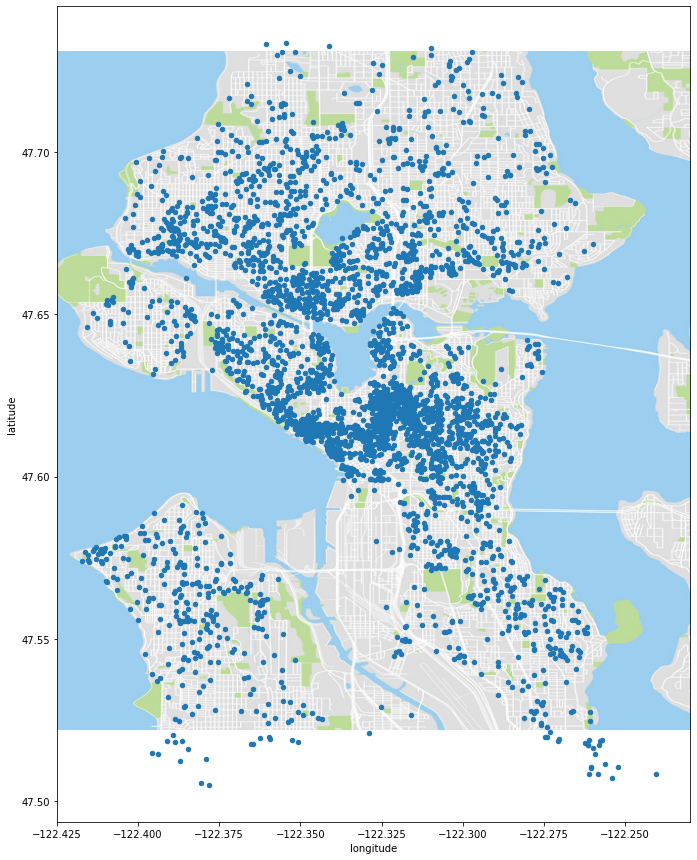

In [222]:
import urllib
#read in stock image
stock_img_url = 'https://cdn4.vectorstock.com/i/1000x1000/54/63/city-map-seattle-color-detailed-plan-vector-22495463.jpg'
seattle_map = urllib.request.urlopen(stock_img_url)
map_plt = plt.imread(seattle_map,'jpg')
map_plt_shape = (map_plt.shape) #(1080, 714, 3)
map_plt = map_plt[0:1000, 50:670, :]
plt.rcParams["figure.figsize"]=15,15

plt.imshow(map_plt, extent=[-122.425, -122.23, 47.522,47.731])
ax = plt.gca()
location_plt=listings_df.plot(kind='scatter', x='longitude', y='latitude' ,ax=ax)


In [182]:
# def plot_feature_by_location(ds, feature):
#   stock_img_url = 'https://cdn4.vectorstock.com/i/1000x1000/54/63/city-map-seattle-color-detailed-plan-vector-22495463.jpg'
#   seattle_map = urllib.request.urlopen(stock_img_url)
#   map_plt = plt.imread(seattle_map,'jpg')
#   map_plt_shape = (map_plt.shape) #(1080, 714, 3)
#   map_plt = map_plt[0:1025, 60:660, :]
#   plt.rcParams["figure.figsize"]=10,10

#   plt.imshow(map_plt, extent=[-122.425, -122.23, 47.50,47.744])
#   ax = plt.gca()
#   location_plt=ds.plot(kind='scatter', x='longitude', y='latitude', c=feature ,ax=ax,
#                                 cmap=plt.get_cmap('Reds'), colorbar=True, alpha=0.6, zorder=5)

In [255]:
def plot_feature_by_location(ds, feature, cmap='Reds'):
  stock_img_url = 'https://cdn4.vectorstock.com/i/1000x1000/54/63/city-map-seattle-color-detailed-plan-vector-22495463.jpg'
  seattle_map = urllib.request.urlopen(stock_img_url)
  map_plt = plt.imread(seattle_map,'jpg')
  map_plt_shape = (map_plt.shape) #(1080, 714, 3)
  map_plt = map_plt[0:1000, 50:670, :]
  plt.rcParams["figure.figsize"]=15,15

  plt.imshow(map_plt, extent=[-122.425, -122.23, 47.522,47.731])
  ax = plt.gca()
  location_plt=ds.plot(kind='scatter', x='longitude', y='latitude', c=feature ,ax=ax,
                                cmap=plt.get_cmap(cmap), colorbar=True, alpha=0.6)
  plt.show()

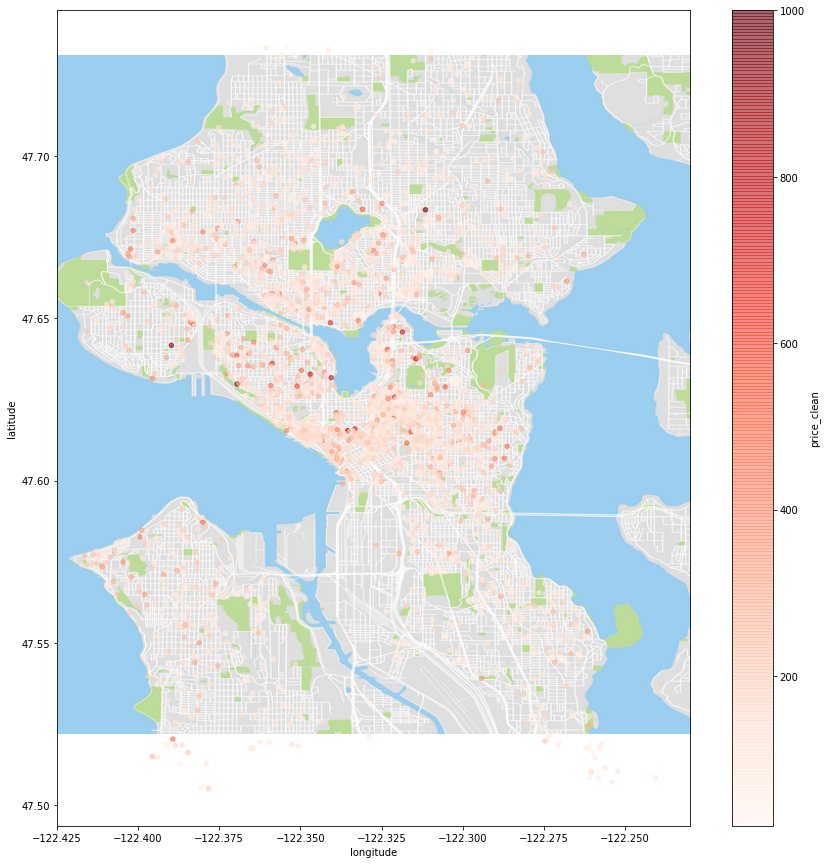

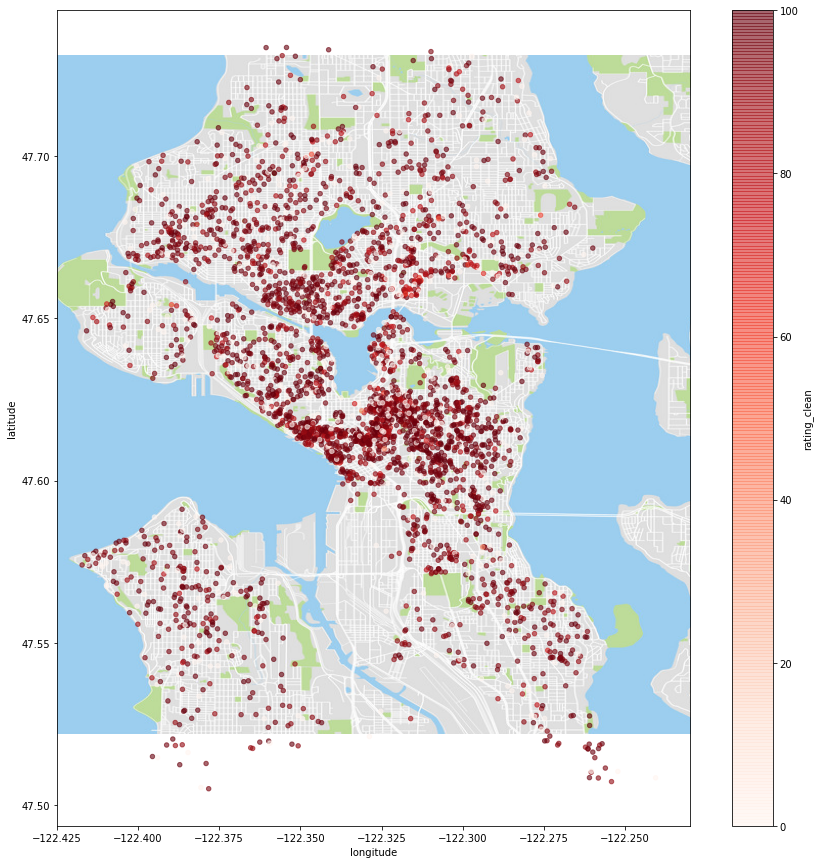

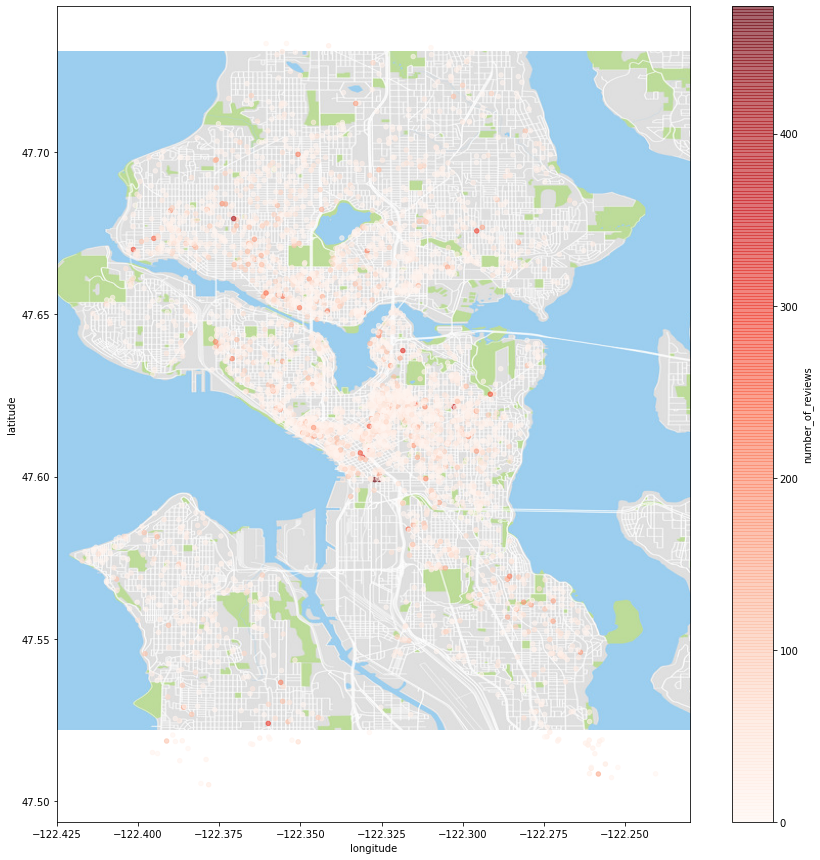

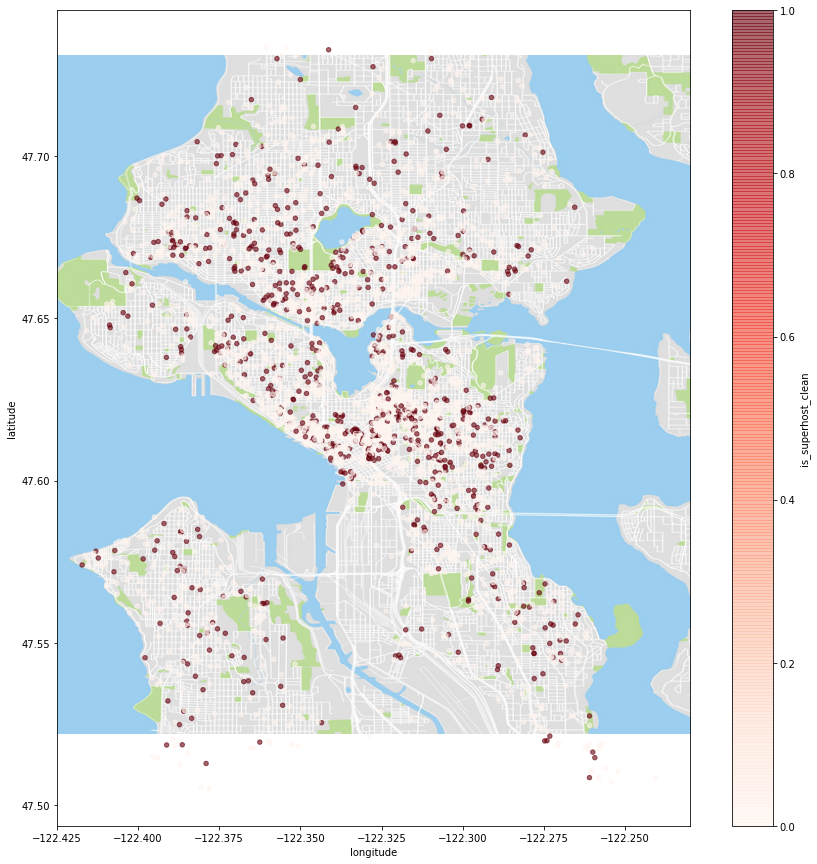

In [256]:
plot_feature_by_location(listings_df, 'price_clean')
plot_feature_by_location(listings_df, 'rating_clean')
plot_feature_by_location(listings_df, 'number_of_reviews')
plot_feature_by_location(listings_df, 'is_superhost_clean')


### Neighbourhoods

In [273]:
neighbourhood_df = listings_df.groupby('neighbourhood_cleansed').agg({'price_clean':['mean', 'count'], 'review_scores_rating':'mean', 'number_of_reviews':'mean', 'is_superhost_clean':'sum'})
neighbourhood_df

price_clean        ... number_of_reviews is_superhost_clean
                              mean count  ...              mean                sum
neighbourhood_cleansed                    ...                                     
Adams                   121.671429    70  ...         27.828571                 22
Alki                    171.619048    42  ...         13.119048                  5
Arbor Heights           126.800000     5  ...          9.200000                  1
Atlantic                111.396226    53  ...         22.000000                 11
Belltown                162.893162   234  ...         20.025641                 42
...                            ...   ...  ...               ...                ...
West Woodland           124.343750    64  ...         33.937500                 17
Westlake                194.470588    17  ...          4.764706                  0
Whittier Heights        128.653846    26  ...         50.307692                 10
Windermere              169.900000    10  ...          8.900000                  2
Yesler Terrace          116.235294    17  ...          9.058824                  0

[87 rows x 5 columns]

In [316]:
# neighbourhood_df['price_clean']['mean']
neighbourhood_most_listings = neighbourhood_df['price_clean']['count'].sort_values(ascending=False)
neighbourhood_most_listings.head(10)


neighbourhood_cleansed
Broadway                     397
Belltown                     234
Wallingford                  167
Fremont                      158
Minor                        135
University District          122
Stevens                      119
First Hill                   108
Central Business District    103
Lower Queen Anne              94
Name: count, dtype: int64

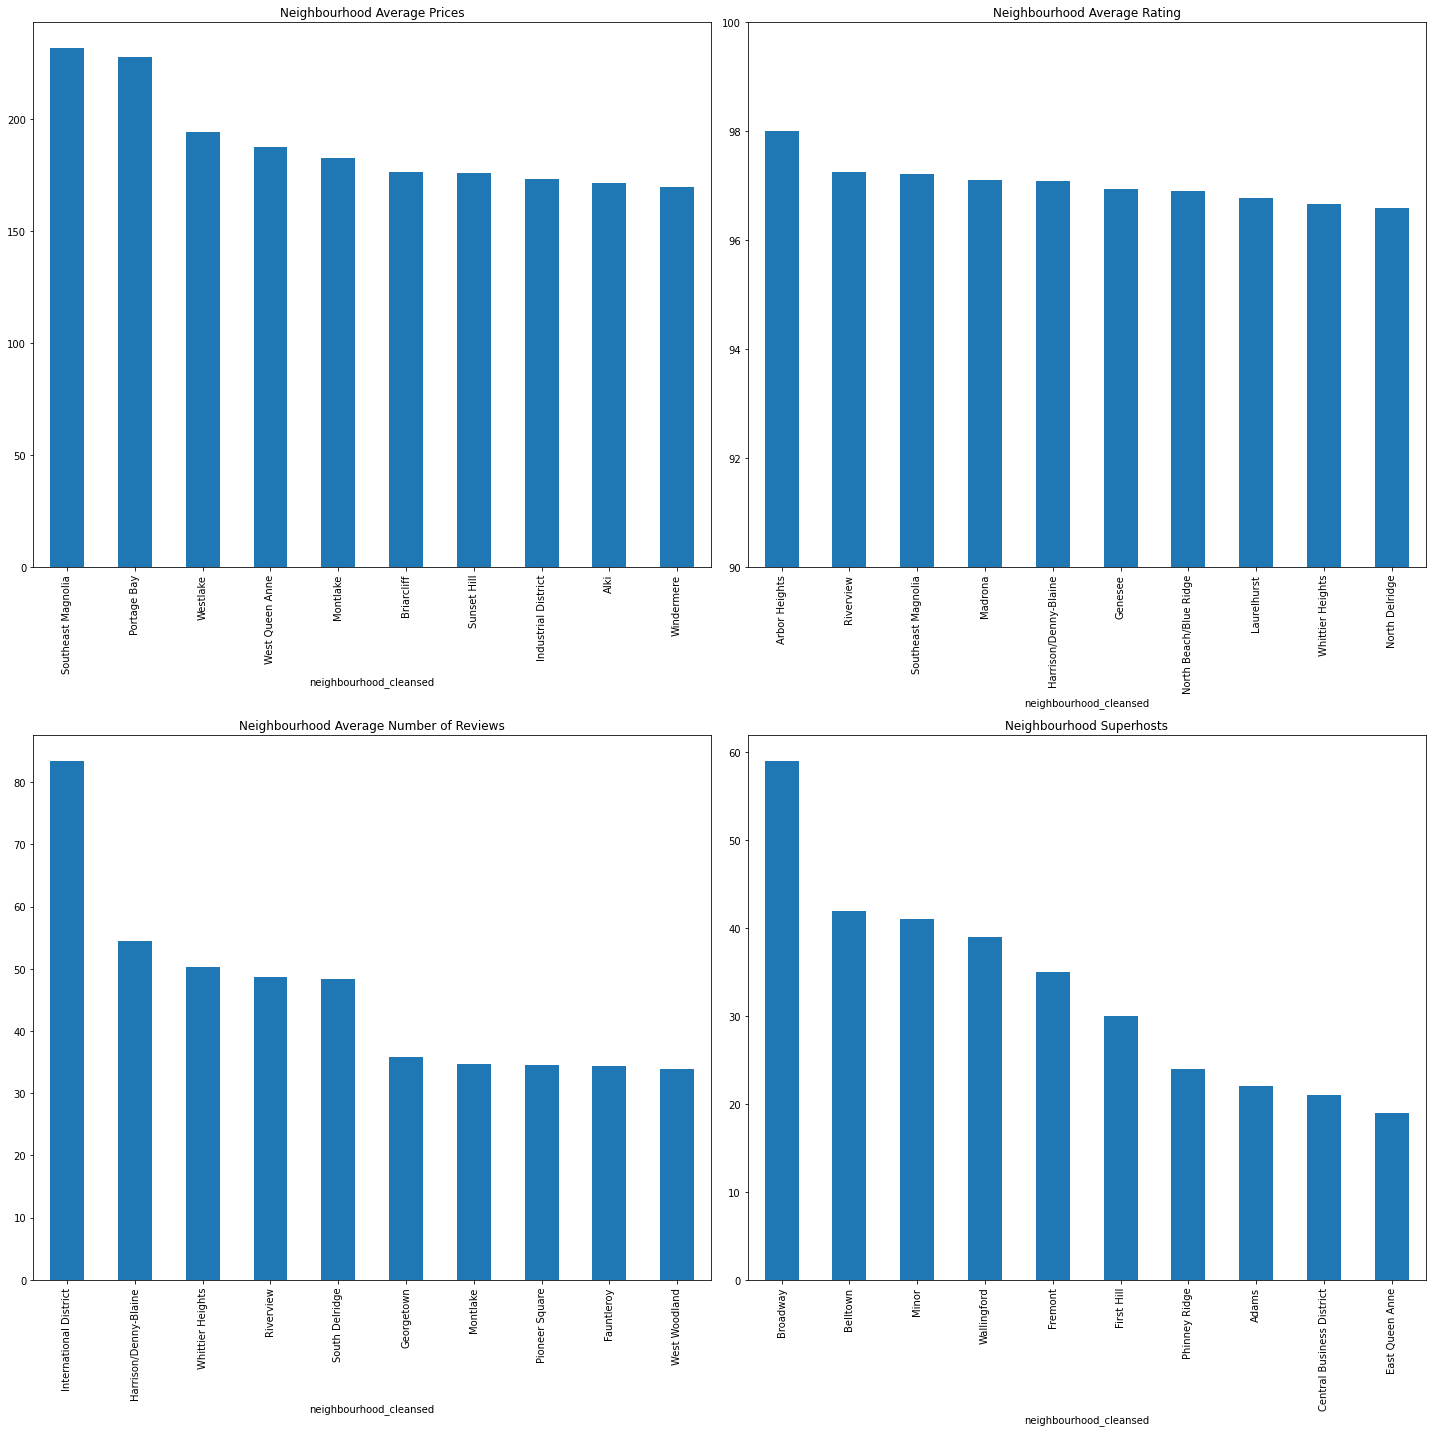

In [318]:
# neighbourhood_df['price_clean']['mean']
plt.rcParams["figure.figsize"]=20,20

plt.subplot(2,2,1)
neighbourhood_avg_price = neighbourhood_df['price_clean']['mean'].sort_values(ascending=False)
neighbourhood_avg_price.head(10).plot(kind='bar')
plt.title('Neighbourhood Average Prices')

plt.subplot(2,2,2)
neighbourhood_avg_rating = neighbourhood_df['review_scores_rating']['mean'].sort_values(ascending=False)
neighbourhood_avg_rating.head(10).plot(kind='bar')
plt.ylim(90,100)
plt.title('Neighbourhood Average Rating')

plt.subplot(2,2,3)
neighbourhood_avg_price = neighbourhood_df['number_of_reviews']['mean'].sort_values(ascending=False)
neighbourhood_avg_price.head(10).plot(kind='bar')
plt.title('Neighbourhood Average Number of Reviews')

plt.subplot(2,2,4)
neighbourhood_avg_price = neighbourhood_df['is_superhost_clean']['sum'].sort_values(ascending=False)
neighbourhood_avg_price.head(10).plot(kind='bar')
plt.title('Neighbourhood Superhosts')

plt.tight_layout()
plt.show()

##Price

#Predictive Models